In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_excel('Session-Summary-for-E6-project.xlsx') 
print("Shape of data=>",df.shape)

Shape of data=> (668, 2)


In [2]:
df.isnull().sum()

SerialNo           0
Session_Summary    0
dtype: int64

**Loading the dataset and checking for the number of characters and words**

Shape of DataFrame: (668, 2)

Columns: Index(['SerialNo', 'Session_Summary'], dtype='object')

Missing Values:
 SerialNo           0
Session_Summary    0
dtype: int64
Number of Duplicate Rows: 0

First few rows:
   SerialNo                                    Session_Summary
0         1  we started our lecture with a recap of previou...
1         2  in this session, we explored various feature e...
2         3  population and sample were further discussed u...
3         4  we first looked at all the summaries and obser...
4         5  midsem metrics for evaluation and also discuss...


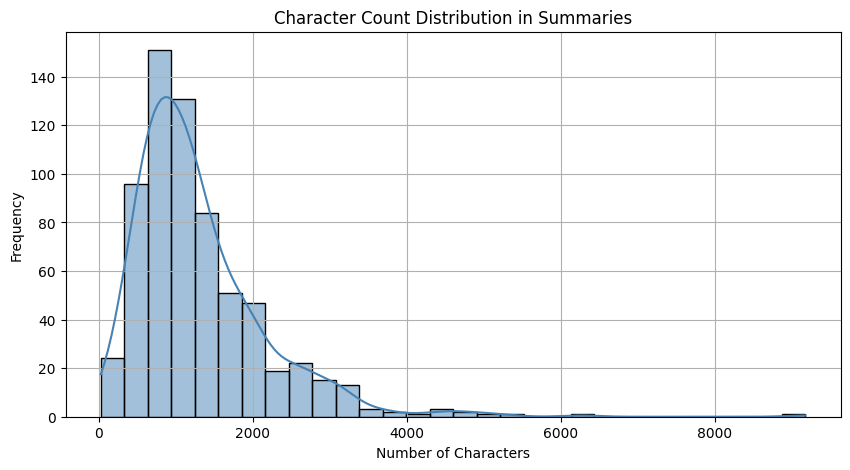

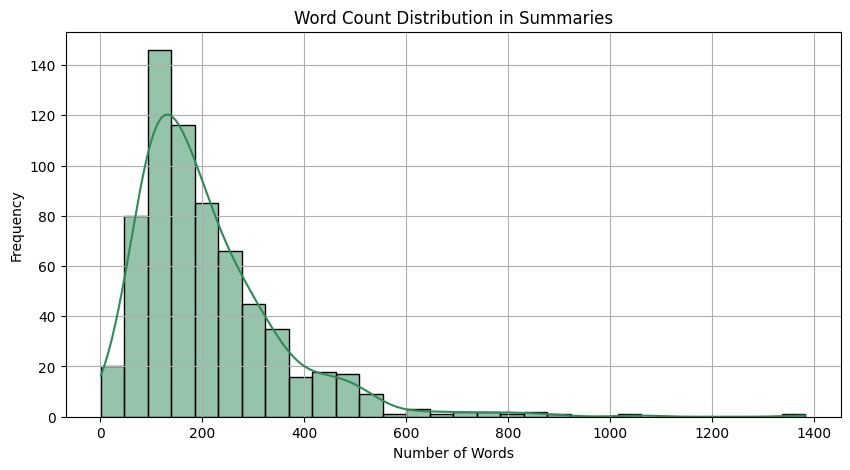


Descriptive Statistics:
        char_count   word_count
count   668.000000   668.000000
mean   1304.393713   210.477545
std     882.915206   146.189925
min      27.000000     1.000000
25%     725.750000   113.000000
50%    1102.500000   174.500000
75%    1611.750000   268.000000
max    9181.000000  1384.000000


In [3]:
# STEP 1 & 2: Load Data, Inspect and Text Length Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Session-Summary-for-E6-project.xlsx'  
df = pd.read_excel(file_path)

# Inspect the structure
print("Shape of DataFrame:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("Number of Duplicate Rows:", df.duplicated().sum())
print("\nFirst few rows:")
print(df.head())

# Add text length features
df['char_count'] = df['Session_Summary'].apply(len)
df['word_count'] = df['Session_Summary'].apply(lambda x: len(str(x).split()))

# Plot: Character Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['char_count'], bins=30, kde=True, color='steelblue')
plt.title('Character Count Distribution in Summaries')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot: Word Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color='seagreen')
plt.title('Word Count Distribution in Summaries')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print descriptive stats
print("\nDescriptive Statistics:")
print(df[['char_count', 'word_count']].describe())


checking for common word and word frequency 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Entries that seem to be links instead of summaries:
     SerialNo                                    Session_Summary
20        21  https://docs.google.com/forms/d/e/1faipqlsffcp...


C:\Users\rajam\AppData\Local\Temp\ipykernel_32460\1158793942.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_df, x='Frequency', y='Word', palette='magma')


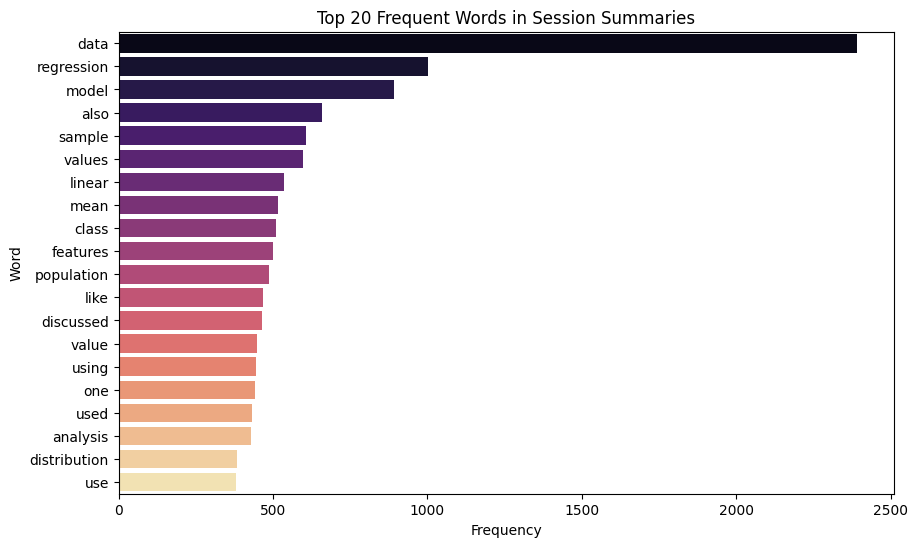

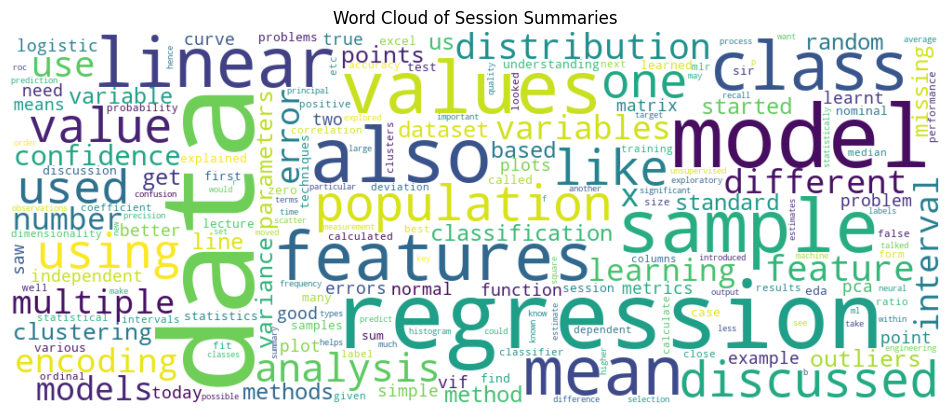

In [4]:
# STEP 3 & 4: Clean text, tokenize, analyze word frequency, and detect links

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Detect entries with URLs instead of summaries
link_rows = df[df['Session_Summary'].str.contains('http', na=False)]
print("Entries that seem to be links instead of summaries:\n", link_rows[['SerialNo', 'Session_Summary']])

# Function to clean and tokenize text
def clean_and_tokenize(text):
    tokens = word_tokenize(str(text).lower())  # Lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply cleaning and tokenization
df['clean_tokens'] = df['Session_Summary'].apply(clean_and_tokenize)

# Collect all tokens
all_tokens = []
df['clean_tokens'].apply(lambda tokens: all_tokens.extend(tokens))

# Word frequency count
word_freq = Counter(all_tokens)
top_words = word_freq.most_common(20)

# Plot top 20 frequent words
top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, x='Frequency', y='Word', palette='magma')
plt.title('Top 20 Frequent Words in Session Summaries')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# WordCloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Session Summaries')
plt.show()


In [8]:
df[['SerialNo', 'Session_Summary', 'clean_tokens']].to_csv('cleaned_summaries.csv', index=False)

using TF-IDF

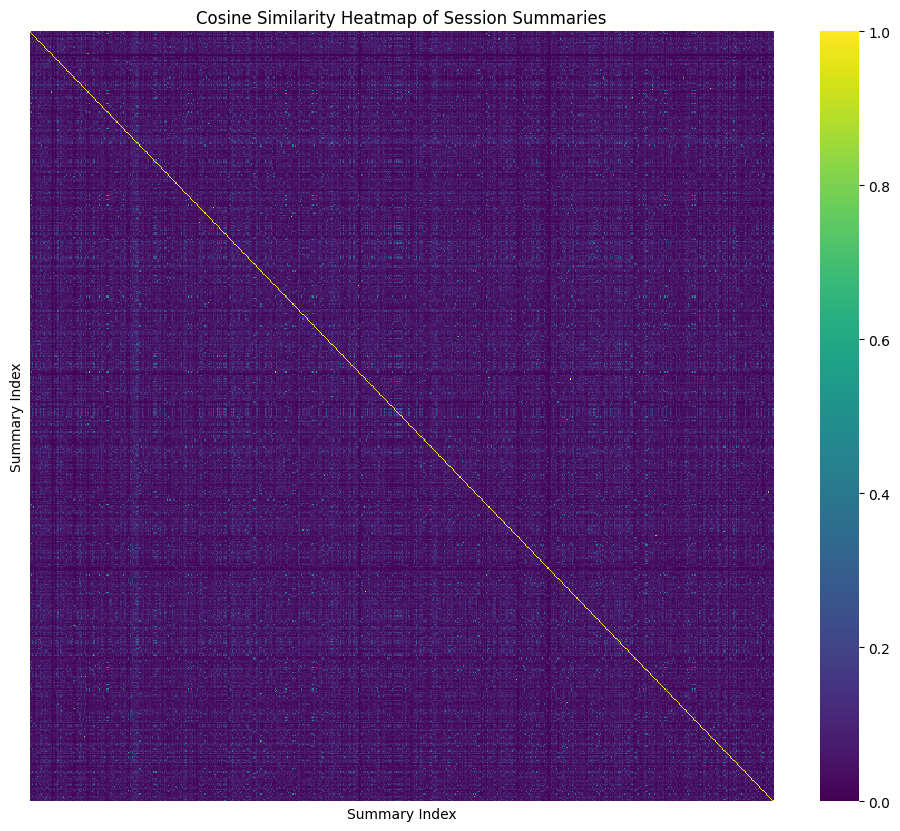

In [5]:
# SIMILARITY HEATMAP BETWEEN SUMMARIES USING TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Use TF-IDF to vectorize the summaries
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Session_Summary'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Heatmap of Session Summaries')
plt.xlabel('Summary Index')
plt.ylabel('Summary Index')
plt.show()


from this heatmap we can see that lexically each summeries are different , but semantically there should be similirity between summeries as there are summeries from same session also. so we are performing BERT-based semantic similirity analysis

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\rajam\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rajam\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

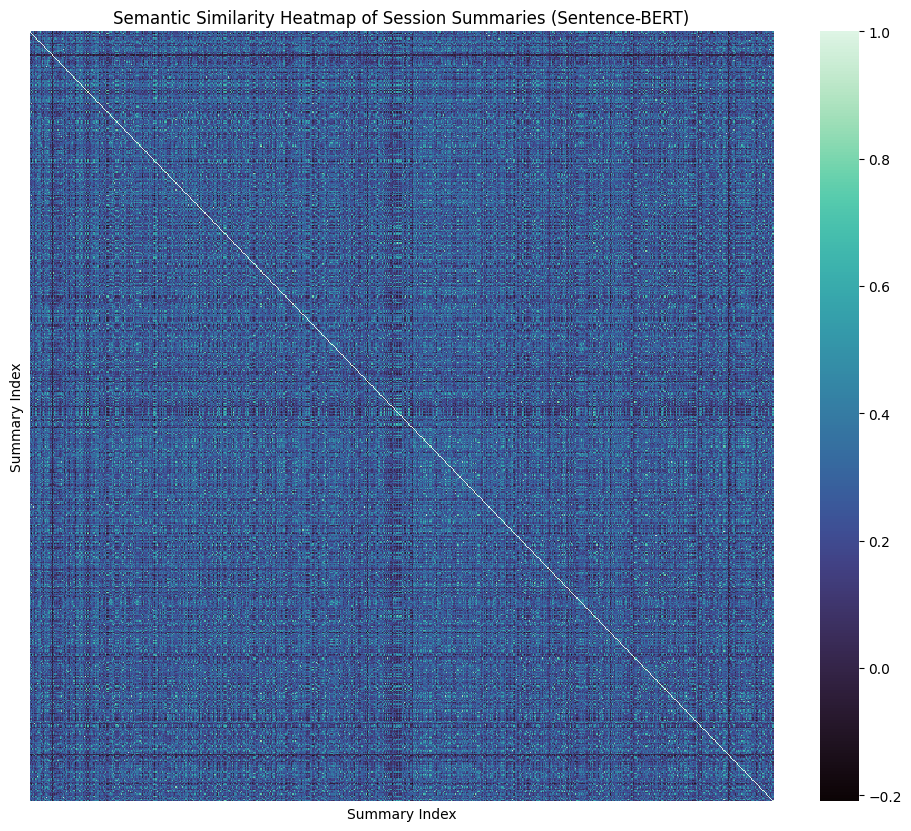

In [6]:
# STEP 1: Install sentence-transformers (if not already installed)
# !pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# STEP 2: Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small, fast, and effective

# STEP 3: Convert summaries to list of strings
summaries = df['Session_Summary'].astype(str).tolist()

# STEP 4: Generate sentence embeddings
embeddings = model.encode(summaries, show_progress_bar=True)

# STEP 5: Compute cosine similarity matrix
semantic_sim_matrix = cosine_similarity(embeddings)

# STEP 6: Plot similarity heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(semantic_sim_matrix, cmap='mako', xticklabels=False, yticklabels=False)
plt.title('Semantic Similarity Heatmap of Session Summaries (Sentence-BERT)')
plt.xlabel('Summary Index')
plt.ylabel('Summary Index')
plt.show()


In [18]:
from sklearn.cluster import KMeans

# Set number of clusters (based on estimated number of sessions)
n_clusters = 14 # Adjust based on your dataset size

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

# Add cluster labels to DataFrame
df['KMeans_Cluster'] = kmeans_labels

# View few samples per cluster
df.groupby('KMeans_Cluster')['Session_Summary'].apply(lambda x: x.sample(2, random_state=1)).reset_index(drop=True)


0     in today's lecture, we built on our previous d...
1      a sample is just a smaller group taken from a...
2     https://docs.google.com/forms/d/e/1faipqlsffcp...
3     \nwe continued (by mainly looking at different...
4     we learned that if we have a large number of f...
5     we started the lecture where we left off last ...
6     learnt about how output is related to input(em...
7     so today we started off with the basics of dat...
8     we were taught about crisp-dm (cross industry ...
9     we studied about crisp-dm\n(cross industry sta...
10    we firstly learnt about polynomial regression,...
11    the following topics were discussed in today's...
12    in this lecture, we continued our discussion o...
13    class started with pivot table. dependinv on t...
14    in todayâ€™s class we continued our discussion...
15    we explored playground tensorflow and worked o...
16    in this session, we learned about multiple lin...
17    1. we learnt solutions in multiple linear 

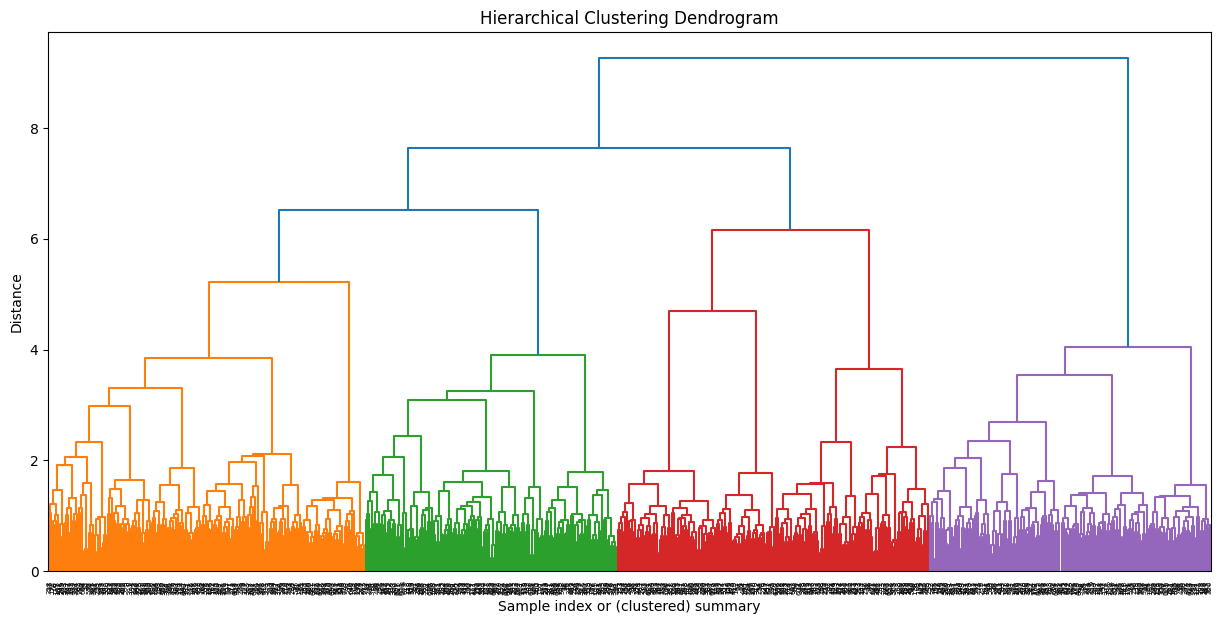

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Create linkage matrix
linked = linkage(embeddings, method='ward')

# Plot dendrogram (may be large, use truncate_mode to limit)
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode='level',  # Change to 'lastp' for fixed # clusters
           p=30)  # Only show last 30 merges
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (clustered) summary')
plt.ylabel('Distance')
plt.show()


 Step 1: Sentence-BERT Featurization

In [22]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load your dataset
df = pd.read_excel("Session-Summary-for-E6-project.xlsx")

# Convert summaries to a list
sentences = df['Session_Summary'].astype(str).tolist()

# Load the Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
bert_embeddings = model.encode(sentences, show_progress_bar=True)

# Create DataFrame for embeddings
bert_emb_df = pd.DataFrame(bert_embeddings)
bert_emb_df.columns = [f'BERT_Feature_{i}' for i in range(bert_emb_df.shape[1])]

# Combine with original data
bert_emb_df = pd.concat([df[['SerialNo', 'Session_Summary']], bert_emb_df], axis=1)

# Preview vectorized data
print(bert_emb_df.head())

# (Optional) Save to file
bert_emb_df.to_csv("bert_vectorized_summaries.csv", index=False)


Batches:   0%|          | 0/21 [00:00<?, ?it/s]

   SerialNo                                    Session_Summary  \
0         1  we started our lecture with a recap of previou...   
1         2  in this session, we explored various feature e...   
2         3  population and sample were further discussed u...   
3         4  we first looked at all the summaries and obser...   
4         5  midsem metrics for evaluation and also discuss...   

   BERT_Feature_0  BERT_Feature_1  BERT_Feature_2  BERT_Feature_3  \
0       -0.010497       -0.012883        0.003275       -0.008045   
1        0.064316       -0.017309       -0.034953       -0.033922   
2       -0.041536       -0.012450       -0.077250        0.050519   
3       -0.044052       -0.003445       -0.017720        0.057968   
4        0.068039       -0.006286        0.025418       -0.033516   

   BERT_Feature_4  BERT_Feature_5  BERT_Feature_6  BERT_Feature_7  ...  \
0        0.070498        0.076708       -0.031465        0.021003  ...   
1       -0.008966        0.084191       

**Step 2: Clustering on Sentence-BERT Embeddings**

K=10, Silhouette Score=0.1150
K=11, Silhouette Score=0.1061
K=12, Silhouette Score=0.1143
K=13, Silhouette Score=0.1221
K=14, Silhouette Score=0.1245
K=15, Silhouette Score=0.1257
K=16, Silhouette Score=0.1221
K=17, Silhouette Score=0.1215
K=18, Silhouette Score=0.1111
K=19, Silhouette Score=0.1122
K=20, Silhouette Score=0.1062


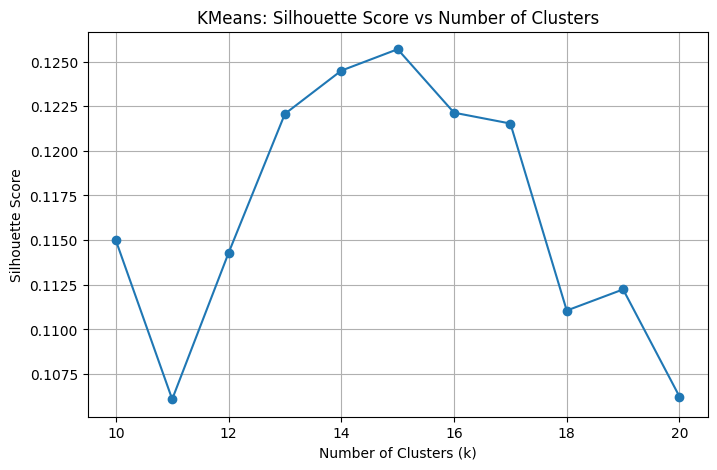

[0.11498797,
 0.10609014,
 0.114281066,
 0.1220732,
 0.12449156,
 0.12569115,
 0.12213703,
 0.1215295,
 0.11105658,
 0.112239905,
 0.10623943]

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def kmeans_silhouette_analysis(embedding_df, k_range=range(10, 21)):
    # Extract only BERT feature columns
    feature_cols = [col for col in embedding_df.columns if col.startswith("BERT_Feature_")]
    embeddings = embedding_df[feature_cols].values

    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(embeddings)
        score = silhouette_score(embeddings, labels)
        silhouette_scores.append(score)
        print(f"K={k}, Silhouette Score={score:.4f}")

    # Plot silhouette scores
    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), silhouette_scores, marker='o')
    plt.title('KMeans: Silhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
    
    return silhouette_scores

# Call the function with your BERT DataFrame
kmeans_silhouette_analysis(bert_emb_df)


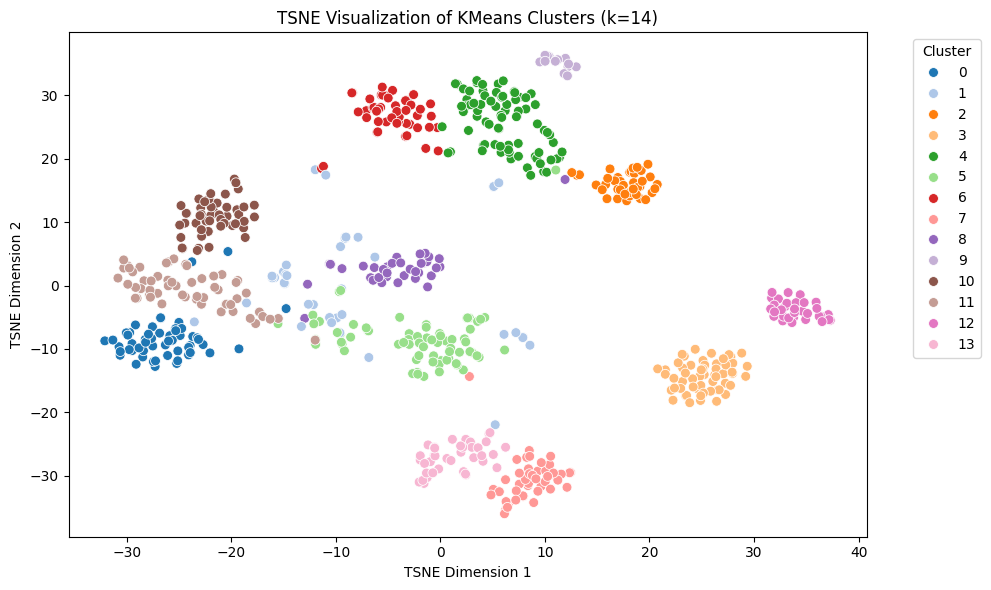

In [28]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def tsne_kmeans_plot(embedding_df, k=14):
    # Extract BERT embedding columns
    feature_cols = [col for col in embedding_df.columns if col.startswith("BERT_Feature_")]
    embeddings = embedding_df[feature_cols].values

    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    embedding_df['kmeans_cluster'] = labels

    # Run TSNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced = tsne.fit_transform(embeddings)
    embedding_df['TSNE_1'] = reduced[:, 0]
    embedding_df['TSNE_2'] = reduced[:, 1]

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=embedding_df,
        x='TSNE_1', y='TSNE_2',
        hue='kmeans_cluster',
        palette='tab20',
        legend='full',
        s=50
    )
    plt.title(f'TSNE Visualization of KMeans Clusters (k={k})')
    plt.xlabel('TSNE Dimension 1')
    plt.ylabel('TSNE Dimension 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return embedding_df

# Run the updated function
bert_emb_df = tsne_kmeans_plot(bert_emb_df, k=14)


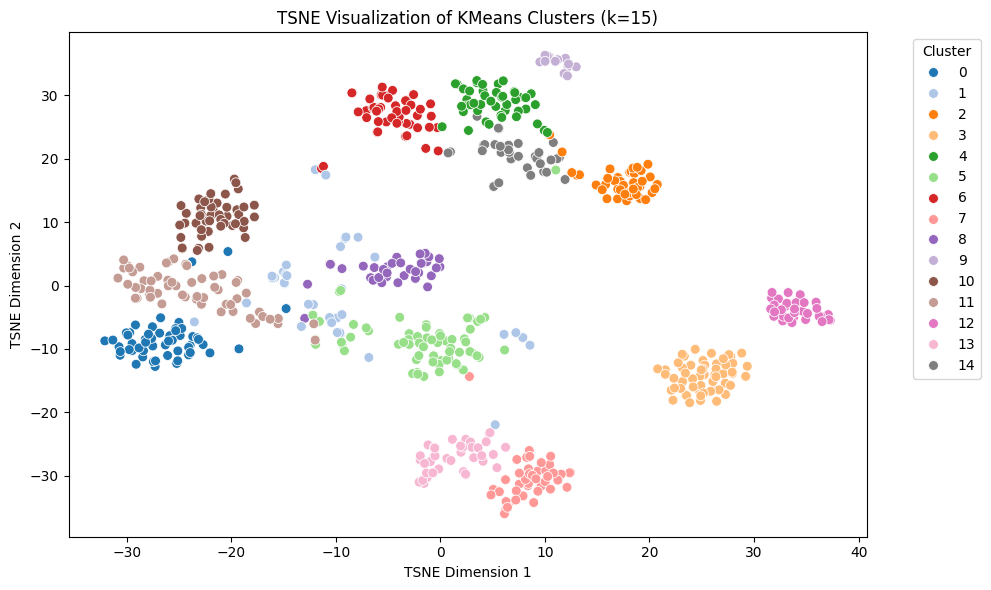

In [29]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def tsne_kmeans_plot(embedding_df, k=15):
    # Extract BERT embedding columns
    feature_cols = [col for col in embedding_df.columns if col.startswith("BERT_Feature_")]
    embeddings = embedding_df[feature_cols].values

    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    embedding_df['kmeans_cluster'] = labels

    # Run TSNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced = tsne.fit_transform(embeddings)
    embedding_df['TSNE_1'] = reduced[:, 0]
    embedding_df['TSNE_2'] = reduced[:, 1]

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=embedding_df,
        x='TSNE_1', y='TSNE_2',
        hue='kmeans_cluster',
        palette='tab20',
        legend='full',
        s=50
    )
    plt.title(f'TSNE Visualization of KMeans Clusters (k={k})')
    plt.xlabel('TSNE Dimension 1')
    plt.ylabel('TSNE Dimension 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return embedding_df

# Run the updated function
bert_emb_df = tsne_kmeans_plot(bert_emb_df, k=15)


In [30]:
# Save all summaries with cluster labels to CSV
bert_emb_df[['SerialNo', 'Session_Summary', 'kmeans_cluster']].to_csv('kmeans_clustered_summaries.csv', index=False)
print("✅ All summaries with KMeans cluster labels saved to 'kmeans_clustered_summaries.csv'")


✅ All summaries with KMeans cluster labels saved to 'kmeans_clustered_summaries.csv'


In [31]:
# Sort summaries by cluster before saving
clustered_df = bert_emb_df[['SerialNo', 'Session_Summary', 'kmeans_cluster']].sort_values(by='kmeans_cluster')

# Save to CSV
clustered_df.to_csv('kmeans_clustered_summaries.csv', index=False)

print("✅ Summaries saved to 'kmeans_clustered_summaries.csv', grouped by cluster ID.")


✅ Summaries saved to 'kmeans_clustered_summaries.csv', grouped by cluster ID.


C:\Users\rajam\AppData\Local\Temp\ipykernel_32460\3565384131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


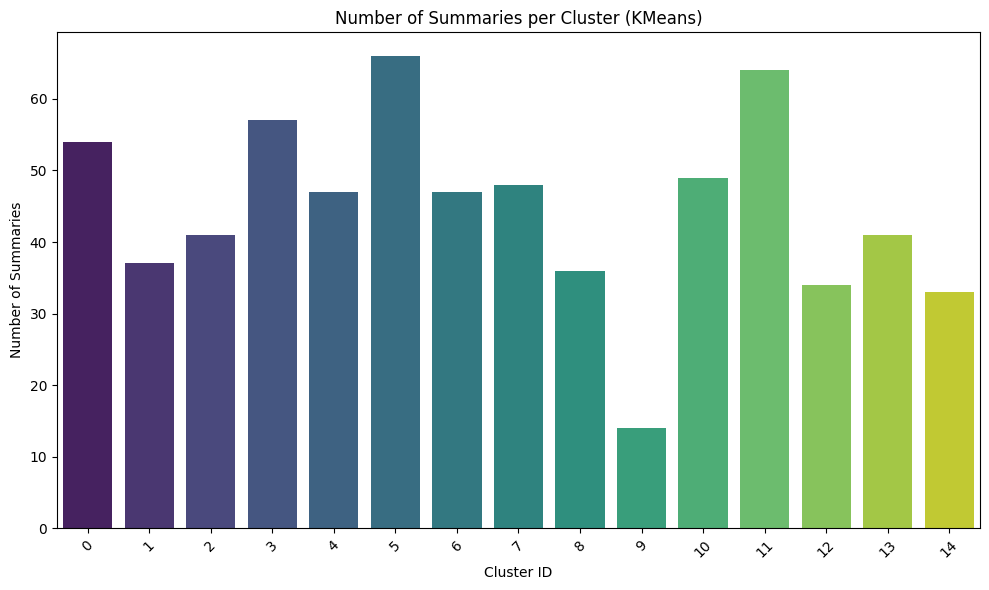

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cluster_distribution(df, cluster_col='kmeans_cluster'):
    cluster_counts = df[cluster_col].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Summaries')
    plt.title('Number of Summaries per Cluster (KMeans)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run the function
plot_cluster_distribution(bert_emb_df)


In [33]:
def print_sample_summaries(df, cluster_col='kmeans_cluster', summary_col='Session_Summary', samples_per_cluster=3):
    print(f"\n📋 Showing {samples_per_cluster} sample summaries from each cluster:\n")
    for cluster_id in sorted(df[cluster_col].unique()):
        print(f"\n🌀 Cluster {cluster_id}:\n" + "-"*40)
        sample_rows = df[df[cluster_col] == cluster_id].sample(
            n=min(samples_per_cluster, len(df[df[cluster_col] == cluster_id])), random_state=42
        )
        for idx, row in sample_rows.iterrows():
            print(f"- {row[summary_col]}\n")

# Run it
print_sample_summaries(bert_emb_df)



📋 Showing 3 sample summaries from each cluster:


🌀 Cluster 0:
----------------------------------------
- predicting population from samples
our objective is to accurately predict population characteristics based on a representative sample. for instance, measuring the heights of all indian citizens by solely sampling primary school students would be an inadequate approach.
key concepts
â€¢	attributes: count, mode, mean, median, standard deviation, variance.
â€¢	operators: count, add, subtract, multiply, divide.
â€¢	levels of measurement: 
o	nominal level:
ï‚§	attributes: count, mode 
ï‚§	operators: count
o	ordinal level:
ï‚§	attributes: count, mode, median 
ï‚§	operators: count
o	interval level:
ï‚§	attributes: count, mode, mean, median, standard deviation, variance 
ï‚§	operators: count, add, subtract
o	ratio level:
ï‚§	attributes: count, mode, mean, median, standard deviation, variance 
ï‚§	operators: count, add, subtract, multiply, divide
these attributes and operators provide esti

k=10, Silhouette Score=0.1040
k=11, Silhouette Score=0.1046
k=12, Silhouette Score=0.1061
k=13, Silhouette Score=0.1111
k=14, Silhouette Score=0.1166
k=15, Silhouette Score=0.1183
k=16, Silhouette Score=0.1205
k=17, Silhouette Score=0.1207
k=18, Silhouette Score=0.1194
k=19, Silhouette Score=0.1162
k=20, Silhouette Score=0.1177


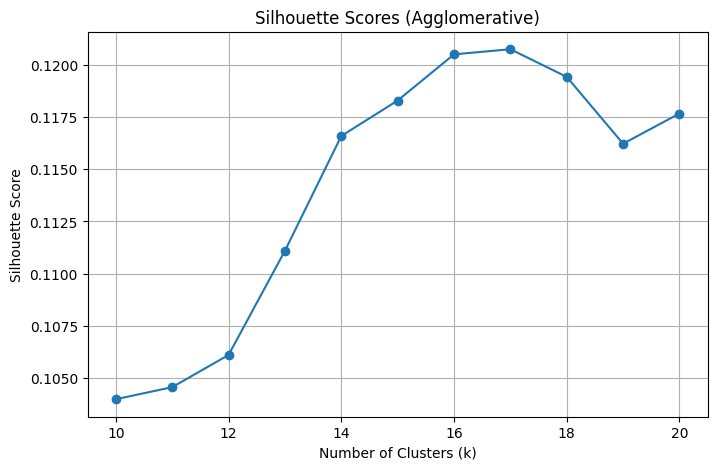

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def run_agglomerative_silhouette(df, min_k=10, max_k=20):
    feature_cols = [col for col in df.columns if col.startswith("BERT_Feature_")]
    X = df[feature_cols].values
    
    silhouette_scores = []
    for k in range(min_k, max_k + 1):
        clustering = AgglomerativeClustering(n_clusters=k)
        labels = clustering.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append((k, score))
        print(f"k={k}, Silhouette Score={score:.4f}")
    
    return silhouette_scores

# Run and plot silhouette scores for Agglomerative
agglo_scores = run_agglomerative_silhouette(bert_emb_df)

# Plot Silhouette Scores
import matplotlib.pyplot as plt

def plot_silhouette_scores(score_list, title='Silhouette Scores (Agglomerative)'):
    ks = [k for k, _ in score_list]
    scores = [score for _, score in score_list]
    
    plt.figure(figsize=(8, 5))
    plt.plot(ks, scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_silhouette_scores(agglo_scores)


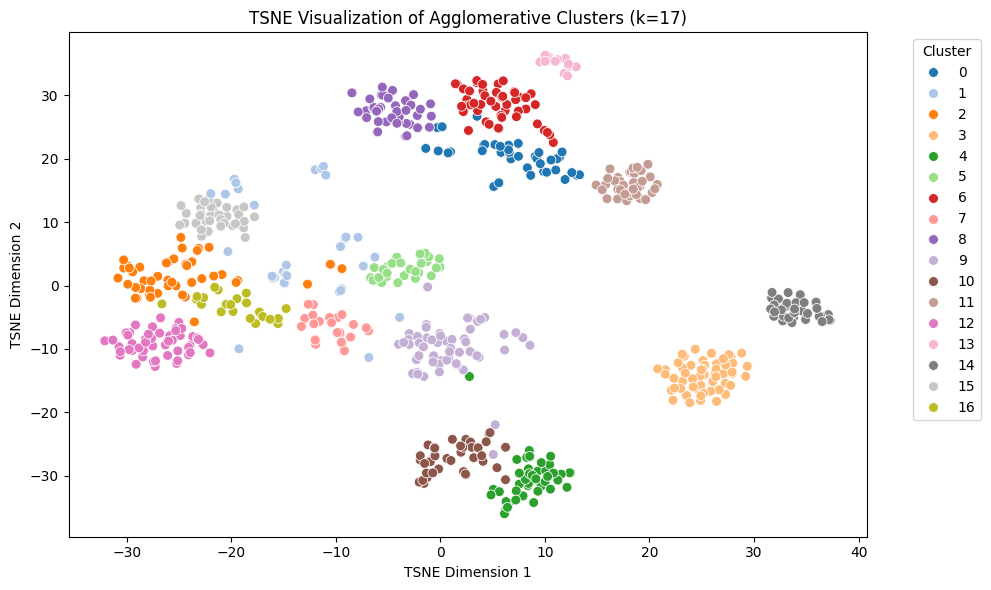

In [35]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

def tsne_agglomerative_plot(df, k=17):
    # Extract features
    feature_cols = [col for col in df.columns if col.startswith("BERT_Feature_")]
    X = df[feature_cols].values

    # Run Agglomerative clustering
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X)
    df['agglo_cluster'] = labels

    # TSNE projection
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced = tsne.fit_transform(X)
    df['TSNE_1'] = reduced[:, 0]
    df['TSNE_2'] = reduced[:, 1]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x='TSNE_1', y='TSNE_2',
        hue='agglo_cluster',
        palette='tab20',
        legend='full',
        s=50
    )
    plt.title(f'TSNE Visualization of Agglomerative Clusters (k={k})')
    plt.xlabel('TSNE Dimension 1')
    plt.ylabel('TSNE Dimension 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return df

# Run the TSNE + Agglomerative visualization
bert_emb_df = tsne_agglomerative_plot(bert_emb_df, k=17)


In [36]:
import os

def save_and_sample_agglomerative_clusters(df, cluster_col='agglo_cluster', summary_col='Session_Summary', base_filename='agglo_cluster'):
    # Create output directory
    os.makedirs('agglo_clustered_summaries', exist_ok=True)

    print(f"\n📁 Saving summaries for each Agglomerative cluster and printing 3 samples:\n")

    for cluster_id in sorted(df[cluster_col].unique()):
        # Filter by cluster
        cluster_df = df[df[cluster_col] == cluster_id]
        
        # Save full cluster to CSV
        filename = f"agglo_clustered_summaries/{base_filename}_{cluster_id}.csv"
        cluster_df.to_csv(filename, index=False)
        print(f"✅ Saved cluster {cluster_id} to {filename}")
        
        # Print 3 sample summaries
        print(f"\n🌀 Cluster {cluster_id} Samples:\n" + "-"*40)
        sample_rows = cluster_df.sample(n=min(3, len(cluster_df)), random_state=42)
        for _, row in sample_rows.iterrows():
            print(f"- {row[summary_col]}\n")

# Run the function
save_and_sample_agglomerative_clusters(bert_emb_df)



📁 Saving summaries for each Agglomerative cluster and printing 3 samples:

✅ Saved cluster 0 to agglo_clustered_summaries/agglo_cluster_0.csv

🌀 Cluster 0 Samples:
----------------------------------------
- evaluated metrics for midsem and exercise.

- paper discussion of midsem 

- the session began with a discussion on the mid-semester exam, where the professor went over the solutions, clarifying key concepts and addressing doubts. this was followed by the ta providing feedback on the exercise, highlighting common mistakes and areas for improvement. after these discussions, the professor moved on to teaching two important topics in machine learning and statistics.

the first topic covered was the variance inflation factor (vif), a measure used to detect multicollinearity in regression models. the professor explained that vif is defined as  represents the coefficient of determination obtained by regressing a feature on all other features. a high vif value indicates strong collinearit

C:\Users\rajam\AppData\Local\Temp\ipykernel_32460\1622250860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='coolwarm')


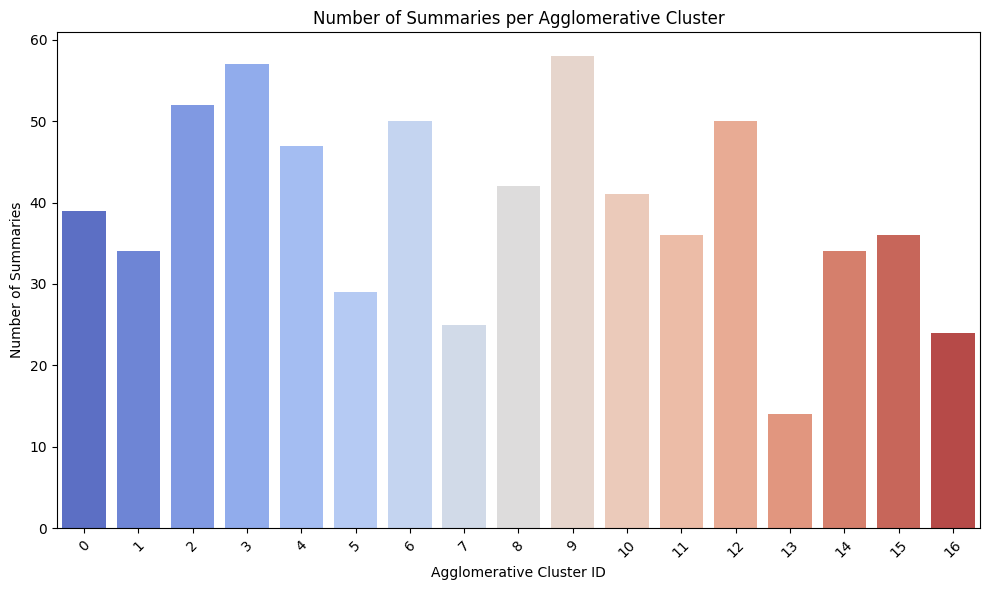

In [37]:
def plot_agglo_cluster_distribution(df, cluster_col='agglo_cluster'):
    cluster_counts = df[cluster_col].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='coolwarm')
    plt.xlabel('Agglomerative Cluster ID')
    plt.ylabel('Number of Summaries')
    plt.title('Number of Summaries per Agglomerative Cluster')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run the plot
plot_agglo_cluster_distribution(bert_emb_df)


**now with USE**

import pandas as pd
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel("Session-Summary-for-E6-project.xlsx")

# Convert summaries to a list
sentences = df['Session_Summary'].astype(str).tolist()

# Load the Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Generate USE embeddings
use_embeddings = use_model(sentences).numpy()

# Create a DataFrame from USE embeddings
use_emb_df = pd.DataFrame(use_embeddings)
use_emb_df.columns = [f'USE_Feature_{i}' for i in range(use_emb_df.shape[1])]

# Combine with original summaries
use_emb_df = pd.concat([df[['SerialNo', 'Session_Summary']], use_emb_df], axis=1)

# Save to CSV
use_emb_df.to_csv("USE_vectorized_summaries.csv", index=False)

# Preview
print("✅ USE Vectorization Complete. Preview:")
print(use_emb_df.head())


k = 10 → Silhouette Score: 0.0869
k = 11 → Silhouette Score: 0.0882
k = 12 → Silhouette Score: 0.0874
k = 13 → Silhouette Score: 0.0850
k = 14 → Silhouette Score: 0.0745
k = 15 → Silhouette Score: 0.0828
k = 16 → Silhouette Score: 0.0879
k = 17 → Silhouette Score: 0.0868
k = 18 → Silhouette Score: 0.0901
k = 19 → Silhouette Score: 0.0864
k = 20 → Silhouette Score: 0.0848


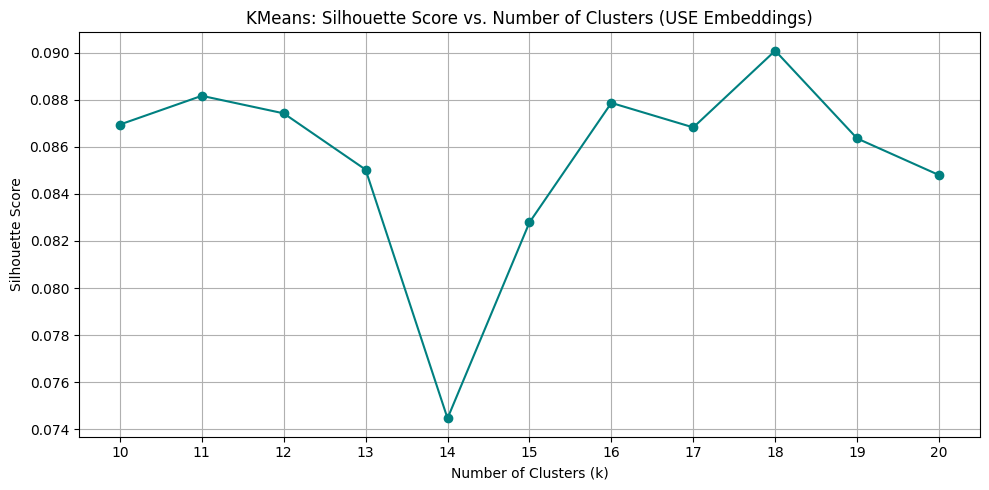

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load USE embeddings
use_emb_df = pd.read_csv("USE_vectorized_summaries.csv")
embedding_cols = [col for col in use_emb_df.columns if col.startswith('USE_Feature')]
X = use_emb_df[embedding_cols]

# Run KMeans for k = 10 to 20 and store silhouette scores
k_values = list(range(10, 21))
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k = {k} → Silhouette Score: {score:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='teal')
plt.xticks(k_values)
plt.title("KMeans: Silhouette Score vs. Number of Clusters (USE Embeddings)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


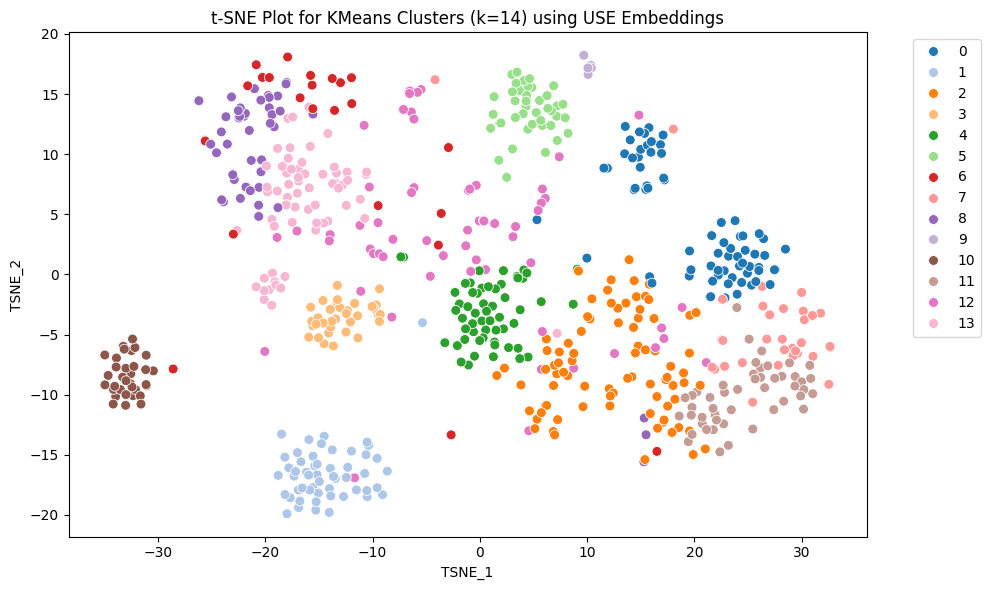


📋 Sample Summaries per Cluster:


--- Cluster 0 ---
- we started the session by differentiating between sample and our population (or the universal data), and defined our goal which is predicting the population and trends existing within from the sample set. we looked at the different results and operations which can be performed on the data, attributes and when they are called parameters (if based on population) and when statistics (based on sample). we also looked at the simple linear regression (slr) and biases which exist within the system. biases are unexplained terms which influence the predictions and account for the missing parameters, not accounted for due to some error. if we account for all parameters then the prediction curve (or straight line) should pass from the origin. we then looked at point predictions, the confidence intervals and how their size affects the confidence percentage. following this and from the scatter plot, we saw the different types of error terms whi

C:\Users\rajam\AppData\Local\Temp\ipykernel_31856\2918214220.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab20')


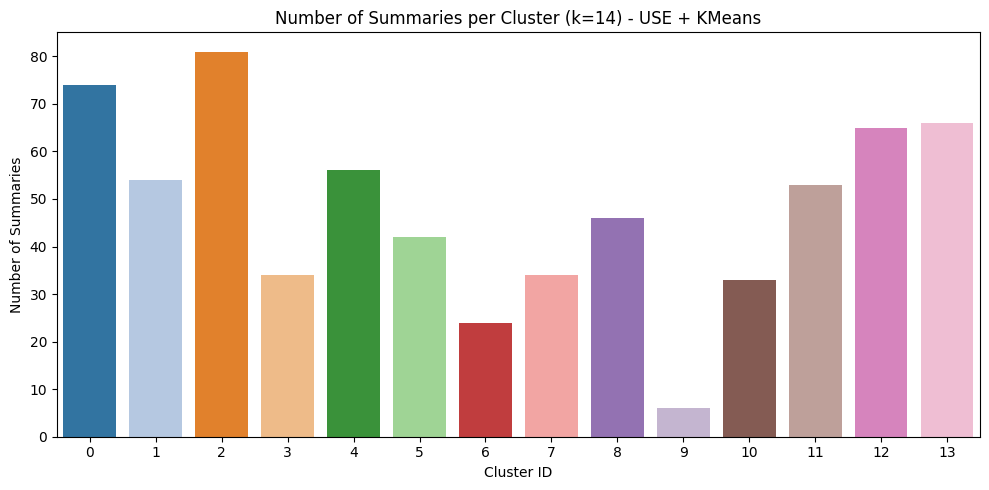

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

# Load USE vectorized data
use_df = pd.read_csv("USE_vectorized_summaries.csv")
summary_col = 'Session_Summary'
embedding_cols = [col for col in use_df.columns if col.startswith('USE_Feature')]

# Step 1: KMeans clustering
k = 14
kmeans = KMeans(n_clusters=k, random_state=42)
use_df['Cluster'] = kmeans.fit_predict(use_df[embedding_cols])

# Step 2: t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_result = tsne.fit_transform(use_df[embedding_cols])
use_df['TSNE_1'] = tsne_result[:, 0]
use_df['TSNE_2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=use_df, x='TSNE_1', y='TSNE_2', hue='Cluster', palette='tab20', legend='full', s=50)
plt.title(f"t-SNE Plot for KMeans Clusters (k={k}) using USE Embeddings")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 3: Print 3 sample summaries per cluster
print("\n📋 Sample Summaries per Cluster:\n")
for cluster_id in range(k):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_samples = use_df[use_df['Cluster'] == cluster_id][summary_col].dropna().tolist()
    for summary in random.sample(cluster_samples, min(3, len(cluster_samples))):
        print(f"- {summary.strip()}")

# Step 4: Save all summaries per cluster to separate CSVs
output_dir = "use_clusters"
os.makedirs(output_dir, exist_ok=True)

for cluster_id in range(k):
    cluster_df = use_df[use_df['Cluster'] == cluster_id]
    cluster_df[['SerialNo', summary_col]].to_csv(f"{output_dir}/USE_Cluster_{cluster_id}.csv", index=False)

# Step 5: Bar plot of cluster sizes
cluster_counts = use_df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab20')
plt.title(f"Number of Summaries per Cluster (k={k}) - USE + KMeans")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Summaries")
plt.tight_layout()
plt.show()


from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

embedding_cols = [col for col in use_df.columns if col.startswith('USE_Feature')]

silhouette_scores = []
k_values = range(2, 25)  # You can adjust this range

for k in k_values:
    agglo = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agglo.fit_predict(use_df[embedding_cols])
    score = silhouette_score(use_df[embedding_cols], cluster_labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='teal')
plt.title('Silhouette Score vs Number of Clusters (Agglomerative Clustering - USE)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

# Load USE vectorized data
use_df = pd.read_csv("USE_vectorized_summaries.csv")
summary_col = 'Session_Summary'
embedding_cols = [col for col in use_df.columns if col.startswith('USE_Feature')]

# Step 1: Agglomerative clustering
k = 15
agglo = AgglomerativeClustering(n_clusters=k)
use_df['Agglo_Cluster'] = agglo.fit_predict(use_df[embedding_cols])

# Step 2: t-SNE visualization
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_result = tsne.fit_transform(use_df[embedding_cols])
use_df['TSNE_1'] = tsne_result[:, 0]
use_df['TSNE_2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=use_df, x='TSNE_1', y='TSNE_2', hue='Agglo_Cluster', palette='tab20', legend='full', s=50)
plt.title(f"t-SNE Plot for Agglomerative Clustering (k={k}) using USE Embeddings")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 3: Print 3 sample summaries per cluster
print("\n📋 Sample Summaries per Agglomerative Cluster:\n")
for cluster_id in range(k):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_samples = use_df[use_df['Agglo_Cluster'] == cluster_id][summary_col].dropna().tolist()
    for summary in random.sample(cluster_samples, min(3, len(cluster_samples))):
        print(f"- {summary.strip()}")

# Step 4: Save all summaries per cluster
output_dir = "use_agglo_clusters"
os.makedirs(output_dir, exist_ok=True)

for cluster_id in range(k):
    cluster_df = use_df[use_df['Agglo_Cluster'] == cluster_id]
    cluster_df[['SerialNo', summary_col]].to_csv(f"{output_dir}/USE_Agglo_Cluster_{cluster_id}.csv", index=False)

# Step 5: Plot number of summaries per cluster
cluster_counts = use_df['Agglo_Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab20')
plt.title(f"Number of Summaries per Agglomerative Cluster (k={k}) - USE")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Summaries")
plt.tight_layout()
plt.show()


import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'use_df' contains the USE embeddings of the summaries
embedding_cols = [col for col in use_df.columns if col.startswith('USE_Feature')]

# Fit the HDBSCAN model
hdb = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
cluster_labels = hdb.fit_predict(use_df[embedding_cols])

# Add the cluster labels to the dataframe
use_df['Cluster'] = cluster_labels

# Get number of clusters and noise points
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Excluding noise points
num_noise = list(cluster_labels).count(-1)

print(f"HDBSCAN — Clusters found: {num_clusters}, Noise points: {num_noise}")


# Perform t-SNE to visualize the clusters
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(use_df[embedding_cols])

# Add t-SNE results to the dataframe
use_df['TSNE-1'] = tsne_results[:, 0]
use_df['TSNE-2'] = tsne_results[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(use_df['TSNE-1'], use_df['TSNE-2'], c=use_df['Cluster'], cmap='Spectral', s=50)
plt.colorbar(label='Cluster ID')
plt.title('t-SNE Visualization of USE Embeddings with HDBSCAN Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [41]:
import transformers
transformers.logging.set_verbosity_error()  # Suppresses unnecessary logs/warnings


In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from nltk.tokenize import word_tokenize

# Load your CSV file
df = pd.read_csv('kmeans_clustered_summaries.csv')  # Replace with your actual file path

# Initialize the Sentence Transformer model for BERT-based embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to calculate cosine similarity between all summaries
def calculate_similarity(summaries):
    embeddings = model.encode(summaries)
    similarity_matrix = cosine_similarity(embeddings)
    return similarity_matrix

# Function to calculate text complexity (using token count for simplicity)
def calculate_detail_score(summaries):
    scores = []
    for summary in summaries:
        tokens = word_tokenize(summary)
        scores.append(len(tokens))  # Token count as a proxy for detail
    return np.array(scores)

# Step 1: Group the summaries by their cluster (session)
clusters = df['cluster'].unique()

# Step 2: Rank summaries within each cluster
ranked_summaries = []

for cluster in clusters:
    # Filter the summaries belonging to the current cluster
    cluster_summaries = df[df['cluster'] == cluster]['summary'].tolist()

    # Step 3: Calculate similarity (Relevance)
    similarity_matrix = calculate_similarity(cluster_summaries)

    # Step 4: Calculate detail (Complexity)
    detail_scores = calculate_detail_score(cluster_summaries)

    # Step 5: Rank summaries by relevance and detail
    relevance_weight = 0.7
    detail_weight = 0.3

    final_scores = []
    for i in range(len(cluster_summaries)):
        # Average similarity of the current summary with all others in the cluster
        relevance_score = np.mean(similarity_matrix[i])
        detail_score = detail_scores[i]

        # Calculate final ranking score
        final_score = relevance_weight * relevance_score + detail_weight * detail_score
        final_scores.append(final_score)

    # Step 6: Rank summaries based on final score (higher is better)
    ranked_cluster_summaries = [x for _, x in sorted(zip(final_scores, cluster_summaries), reverse=True)]
    ranked_summaries.extend(ranked_cluster_summaries)

# Add rankings to the DataFrame
df['rank'] = np.nan
for idx, cluster in enumerate(clusters):
    cluster_summaries = df[df['cluster'] == cluster]
    ranked_summaries_cluster = ranked_summaries[idx: idx + len(cluster_summaries)]
    
    # Update rank for the summaries in this cluster
    for i, summary in enumerate(ranked_summaries_cluster):
        df.loc[df['summary'] == summary, 'rank'] = i + 1

# Step 7: Save the results (ranked summaries)
df.to_csv('ranked_summaries.csv', index=False)  # Save to a new CSV file

print("Summaries ranked successfully and saved to 'ranked_summaries.csv'")


RuntimeError: Failed to import transformers.models.aria.configuration_aria because of the following error (look up to see its traceback):
No module named 'transformers.models.aria.configuration_aria'

In [43]:
import pandas as pd
from fpdf import FPDF

# Load your ranked CSV
df = pd.read_csv("ranked_summaries_detailed_and_relevant(in).csv")

# Create PDF class
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, "Top 5 Session Summaries per Cluster", ln=True, align="C")
        self.ln(5)

    def chapter_title(self, cluster_id):
        self.set_font("Arial", "B", 12)
        self.set_text_color(0, 0, 128)
        self.cell(0, 10, f"Cluster {cluster_id}", ln=True)
        self.ln(2)

    def summary_text(self, summary, rank):
        self.set_font("Arial", "", 11)
        self.set_text_color(0)
        self.multi_cell(0, 7, f"{rank}. {summary}")
        self.ln(2)

# Create PDF object
pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Loop over clusters
for cluster_id in sorted(df['kmeans_cluster'].unique()):
    cluster_df = df[df['kmeans_cluster'] == cluster_id]
    top_5 = cluster_df.nsmallest(5, 'rank_in_cluster')

    pdf.chapter_title(cluster_id)
    for i, row in enumerate(top_5.itertuples(), 1):
        pdf.summary_text(row.Session_Summary, i)

# Save PDF
pdf_output_path = "top5_summaries_per_cluster.pdf"
pdf.output(pdf_output_path)

print("✅ PDF exported:", pdf_output_path)


ModuleNotFoundError: No module named 'fpdf'